In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = 'heart.csv'
heart_dataset = pd.read_csv(dataset)

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_dataset.shape

(1025, 14)

In [6]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_dataset['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
X = heart_dataset.drop(columns='target', axis=1)
Y = heart_dataset['target']

In [12]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [13]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [14]:
sc= StandardScaler()
X = sc.fit_transform(X)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_reg = LogisticRegression()

In [19]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [20]:
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8585365853658536


In [22]:
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_class = RandomForestClassifier()

In [26]:
rf_class.fit(X_train,Y_train)

RandomForestClassifier()

In [27]:
rf_class_train_prediction = rf_class.predict(X_train)

In [28]:
accuracy_score(Y_train,rf_class_train_prediction)

1.0

In [29]:
rf_class_test_prediction = rf_class.predict(X_test)

In [30]:
accuracy_score(Y_test,rf_class_test_prediction)

1.0

Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
gbc = GradientBoostingClassifier()

In [33]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [34]:
gbc_train_prediction = gbc.predict(X_train)

In [35]:
accuracy_score(Y_train,gbc_train_prediction)

0.9878048780487805

In [36]:
gbc_test_prediction = gbc.predict(X_test)

In [37]:
accuracy_score(Y_test,gbc_test_prediction)

0.9853658536585366

In [38]:
train_final_data = pd.DataFrame({'Models':['LR-Train','RFC-Train','GBC-Train'],
                          'Accuracy Score':[training_data_accuracy*100,
                                            accuracy_score(Y_train,rf_class_train_prediction)*100,
                                            accuracy_score(Y_train,gbc_train_prediction)*100]})

In [39]:
train_final_data

,Models,Accuracy Score
0,LR-Train,85.853659
1,RFC-Train,100.000000
2,GBC-Train,98.780488


In [40]:
test_final_data = pd.DataFrame({'Models':['LR-Test','RFC-Test','GBC-Test'],
                          'Accuracy Score':[test_data_accuracy*100,
                                            accuracy_score(Y_test,rf_class_test_prediction)*100,
                                            accuracy_score(Y_test,gbc_test_prediction)*100]})

In [41]:
test_final_data

,Models,Accuracy Score
0,LR-Test,80.487805
1,RFC-Test,100.000000
2,GBC-Test,98.536585


In [42]:
import seaborn as sns

C:\Users\albar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy Score'>

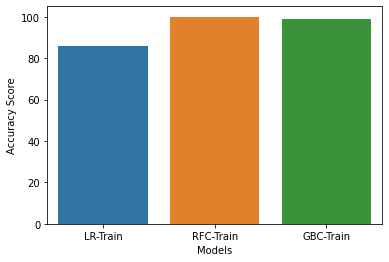

In [43]:
sns.barplot(train_final_data['Models'],train_final_data['Accuracy Score'])

C:\Users\albar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy Score'>

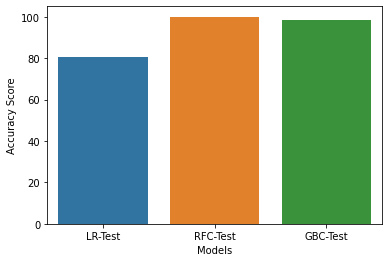

In [44]:
sns.barplot(test_final_data['Models'],test_final_data['Accuracy Score'])

In [45]:
X=heart_dataset.drop('target',axis=1)
Y=heart_dataset['target']

Model Prediction

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_class = RandomForestClassifier()
rf_class.fit(X,Y)

RandomForestClassifier()

In [48]:
new_data = pd.DataFrame({
    'age':34,
    'sex':0,
    'cp':1,
    'trestbps':118,
    'chol':210,
    'fbs':0,
    'restecg':1,
    'thalach':192,
    'exang':0,
    'oldpeak':0.7,
     'slope':2,
    'ca':0,
    'thal':2,    
},index=[0])

In [49]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [50]:
predictor = rf_class.predict(new_data)
if predictor[0]==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [51]:
from tkinter import *
from PIL import Image, ImageTk

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    result=rf_class.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease",bg = 'yellow',font = 'bold').grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease",bg = 'yellow',font = 'bold').grid(row=31)
    
    
master = Tk()
master.geometry('800x500')
master.title("Heart Disease Prediction")

#background image loading

load = Image.open('pic.jpg')
render = ImageTk.PhotoImage(load)
img = Label(master, image = render)
img.place(x = 0, y = 0)




label = Label(master, text = "Heart Disease Prediction"
                     , bg = "red", fg = "black",font = 'Ariel 15 bold italic'). \
                               grid(row=1,columnspan=2)


Label(master,bg ='PeachPuff4').grid()
Label(master, text="Enter Your Age",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=3)
Label(master, text="Male Or Female [1/0]",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=4)
Label(master, text="Enter Value of Chest Pain",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=5)
Label(master, text="Enter Value of Resting Blood Pressure",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=6)
Label(master, text="Enter Value of Cholestrol",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=7)
Label(master, text="Enter Value of Fasting Blood Sugar",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=8)
Label(master, text="Enter Value of Resting ECG",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=9)
Label(master, text="Enter Value of thalach(Maximum Heart Rate Achieved)",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=10)
Label(master, text="Enter Value of Exercise Induced Angina",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=11)
Label(master, text="Enter Value of oldpeak",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=12)
Label(master, text="Enter Value of slope",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=13)
Label(master, text="Enter Value of ca",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=14)
Label(master, text="Enter Value of thal",bg = 'PeachPuff4',fg = 'white',font = 'bold').grid(row=15)
Label(master,bg = 'PeachPuff4').grid(row=16)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=3, column=1)
e2.grid(row=4, column=1)
e3.grid(row=5, column=1)
e4.grid(row=6, column=1)
e5.grid(row=7, column=1)
e6.grid(row=8, column=1)
e7.grid(row=9, column=1)
e8.grid(row=10, column=1)
e9.grid(row=11, column=1)
e10.grid(row=12, column=1)
e11.grid(row=13, column=1)
e12.grid(row=14, column=1)
e13.grid(row=15, column=1)

def clear_text():
    e1.delete(0, END)
    e2.delete(0, END)
    e3.delete(0, END)
    e4.delete(0, END)
    e5.delete(0, END)
    e6.delete(0, END)
    e7.delete(0, END)
    e8.delete(0, END)
    e9.delete(0, END)
    e10.delete(0, END)
    e11.delete(0, END)
    e12.delete(0, END)
    e13.delete(0, END)
    

Button(master, text='Predict', command=show_entry_fields).grid(column=1)
Button(master, text='Clear', command=clear_text).grid(column=1)


master.mainloop()